### Importer les packages et les données

In [5]:
import pyforest
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
data = pd.read_csv('data/concat_data/Data_Agriculture_Urbanization.csv')
# data = data.drop('Unnamed: 0', axis = 1)

<IPython.core.display.Javascript object>

In [2]:
data.head()

,region,Date,Ménages exploitant moins de 3 parcelles (%),Ménages exploitant 3 à 5 parcelles (%),Ménages exploitant plus de 6 parcelles (%),Nombre moyen de parcelles par ménage,Superficie moyenne des parcelles par ménage (Ha),Taille moyenne des ménages,Effectif de la population,Population rurale,Population urbaine,Taux d'urbanisation
0,Dakar,2017,96.799999,40.360239,9.933108,1.208000,0.462637,4.904000,3529300.0,127054.0,3402246.0,96.400023
1,Dakar,2018,100.000000,0.000000,0.000000,1.041970,0.465369,5.363169,3630324.0,130693.0,3499631.0,96.399963
2,Diourbel,2017,12.540621,64.680761,22.778620,4.337563,3.078930,9.519451,1692967.0,1418707.0,274260.0,16.199961
3,Diourbel,2018,25.740260,57.751203,16.508539,3.816028,4.645847,10.407418,1746496.0,1463564.0,282932.0,16.199980
4,Fatick,2017,37.248814,52.979088,9.772102,3.295946,2.884257,7.974183,813542.0,676053.0,137489.0,16.900049


### Variable cible 

In [3]:
risque_deforestation = [1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1]
data['risque_deforestation'] = risque_deforestation

- 1 : signifie que la région est fortement menacée par la déforestation
- 0 : signifie que la région est faiblement menacée par la déforestation   

### Jeu de donnée final avec la variable cible

In [4]:
data.head()

,region,Date,Ménages exploitant moins de 3 parcelles (%),Ménages exploitant 3 à 5 parcelles (%),Ménages exploitant plus de 6 parcelles (%),Nombre moyen de parcelles par ménage,Superficie moyenne des parcelles par ménage (Ha),Taille moyenne des ménages,Effectif de la population,Population rurale,Population urbaine,Taux d'urbanisation,risque_deforestation
0,Dakar,2017,96.799999,40.360239,9.933108,1.208000,0.462637,4.904000,3529300.0,127054.0,3402246.0,96.400023,1
1,Dakar,2018,100.000000,0.000000,0.000000,1.041970,0.465369,5.363169,3630324.0,130693.0,3499631.0,96.399963,1
2,Diourbel,2017,12.540621,64.680761,22.778620,4.337563,3.078930,9.519451,1692967.0,1418707.0,274260.0,16.199961,0
3,Diourbel,2018,25.740260,57.751203,16.508539,3.816028,4.645847,10.407418,1746496.0,1463564.0,282932.0,16.199980,0
4,Fatick,2017,37.248814,52.979088,9.772102,3.295946,2.884257,7.974183,813542.0,676053.0,137489.0,16.900049,0


### Exploration des données

In [12]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

<IPython.core.display.Javascript object>

,Date,Ménages exploitant moins de 3 parcelles (%),Ménages exploitant 3 à 5 parcelles (%),Ménages exploitant plus de 6 parcelles (%),Nombre moyen de parcelles par ménage,Superficie moyenne des parcelles par ménage (Ha),Taille moyenne des ménages,Effectif de la population,Population rurale,Population urbaine,Taux d'urbanisation,risque_deforestation
count,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00
mean,2017.50,53.93,40.36,9.93,2.77,2.69,9.31,1106515.00,591002.61,515512.39,34.54,0.43
std,0.51,28.58,19.57,7.18,1.06,1.76,1.95,837422.52,330100.12,863920.63,21.04,0.50
min,2017.00,12.54,0.00,0.00,1.04,0.46,4.90,172482.00,126257.00,46225.00,16.20,0.00
25%,2017.00,29.62,34.40,5.13,2.16,1.03,8.53,655086.00,412117.25,142268.00,22.27,0.00
50%,2017.50,54.40,41.40,9.85,2.67,2.87,9.25,812808.50,546967.50,222464.00,26.35,0.00
75%,2018.00,71.80,56.79,11.67,3.55,3.76,10.54,1094949.00,698138.00,407346.25,47.87,1.00
max,2018.00,100.00,67.12,24.93,4.49,8.03,12.34,3630324.00,1463564.00,3499631.00,96.40,1.00


<AxesSubplot:>

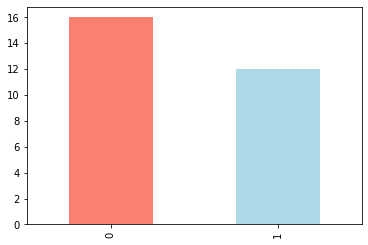

In [13]:
data.risque_deforestation.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [14]:
data.isna().sum()

region                                              0
Date                                                0
Ménages exploitant moins de 3 parcelles (%)         0
Ménages exploitant 3 à 5 parcelles (%)              0
Ménages exploitant plus de 6 parcelles (%)          0
Nombre moyen de parcelles par ménage                0
Superficie moyenne des parcelles par ménage (Ha)    0
Taille moyenne des ménages                          0
Effectif de la population                           0
Population rurale                                   0
Population urbaine                                  0
Taux d'urbanisation                                 0
risque_deforestation                                0
dtype: int64

### Matrice de corrélation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(12.5, -0.5)

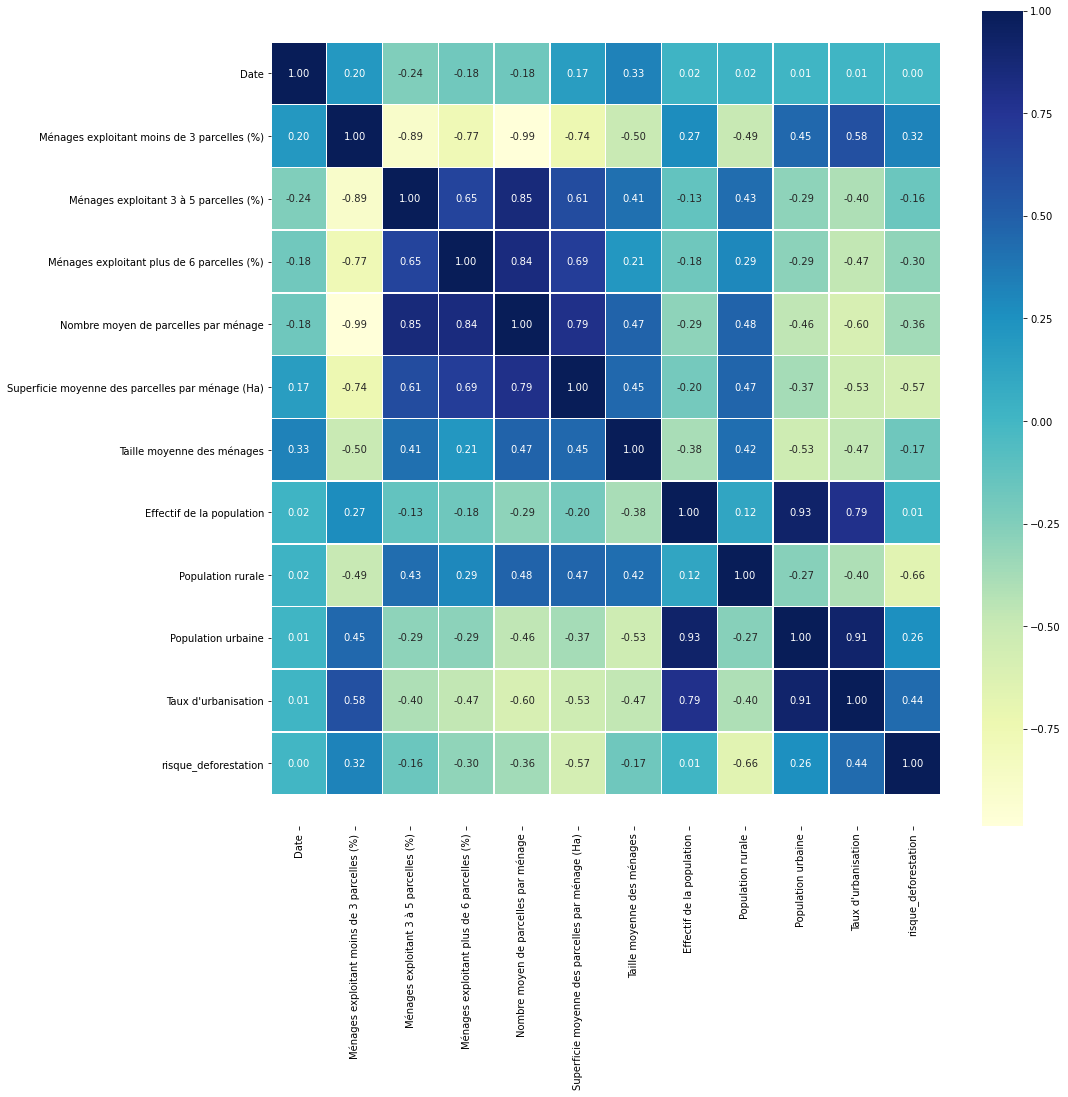

In [15]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation avec la variable risque_deforestation'}>

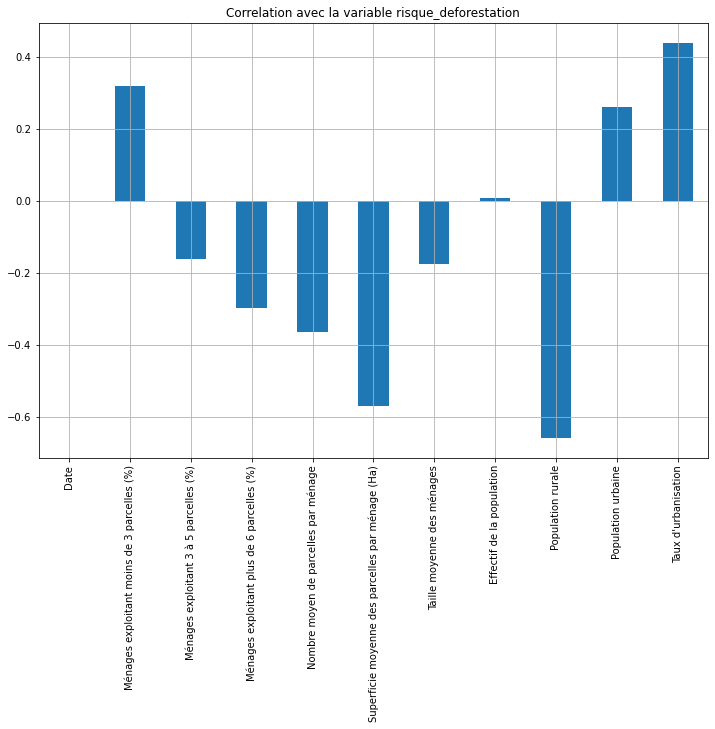

In [16]:
data.drop('risque_deforestation', axis=1).corrwith(data.risque_deforestation).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation avec la variable risque_deforestation")

- On constate que les variable 'Population rurale', 'Nombre moyen de parcelles par ménage (%)', 'Superficie moyenne des parcelles par ménage (Ha)', 'Taux d'urbanisation' et 'Zone Perdue' sont les plus correlée avec la variavle risque_deforestation. Ainsi ces variables sont considèrées comme étant de bons prédicteurs de la variable risque_deforestation. 


##### Sélectionner que les variables les plus ou moins correlées à la variable cible 

In [29]:
columns_selected  = [ 'Nombre moyen de parcelles par ménage',
                    'Superficie moyenne des parcelles par ménage (Ha)', 'Population rurale', "Taux d'urbanisation", 'risque_deforestation']
data = data[columns_selected]

### Transformation des données

In [30]:
X = data.drop(['risque_deforestation'], axis  = 1 ) 
y = data.risque_deforestation

In [31]:
# # categorical_val.remove('target')
# # dataset = pd.get_dummies(df, columns = categorical_val)

# from sklearn.preprocessing import StandardScaler

# s_sc = StandardScaler()
# # col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# # dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])
# X = s_sc.fit_transform(X)

### Fractionner les données

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

### Application de la méthode RandomForest

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Trouver les paramètres optimaux

In [34]:
rfc=RandomForestClassifier(random_state=42)

<IPython.core.display.Javascript object>

In [35]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [36]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [37]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

##### Application de la méthode avec les paramètres optimaux

In [38]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, 
                            max_depth=4, criterion='gini')
rfc1.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
print_score(rfc1, X_train, y_train, X_test, y_test, train=True)
print_score(rfc1, X_train, y_train, X_test, y_test, train=False)

<IPython.core.display.Javascript object>

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0    1  accuracy  macro avg  weighted avg
precision  1.00 1.00      1.00       1.00          1.00
recall     1.00 1.00      1.00       1.00          1.00
f1-score   1.00 1.00      1.00       1.00          1.00
support   10.00 9.00      1.00      19.00         19.00
_______________________________________________
Confusion Matrix: 
 [[10  0]
 [ 0  9]]



<IPython.core.display.Javascript object>

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision 0.83 0.67      0.78       0.75          0.78
recall    0.83 0.67      0.78       0.75          0.78
f1-score  0.83 0.67      0.78       0.75          0.78
support   6.00 3.00      0.78       9.00          9.00
_______________________________________________
Confusion Matrix: 
 [[5 1]
 [1 2]]



- Le modèle est performant à environ 100 % sur les données d'entrainement et à environ 77.78 % sur les données de test.

##### Prédiction 

In [40]:
def Prédiction(Value): 
    if Value == [1]: 
        print('PREDICTION : \n La région est fortement menacée par la déforestation')
    else:
        print('PREDICTION : \n La région est faiblement menacée par la déforestation')

In [41]:
Value = rfc1.predict([[65.99, 2.32, 1.03, 48.20]])
Prédiction(Value)

PREDICTION : 
 La région est fortement menacée par la déforestation
